# Grover's Algorithm
Goal : 
reference : 
https://utokyo-icepp.github.io/qc-workbook/grover.html

## 1. make algorithm searching $2^1$ of 1

## 2. make algorithm searching 1 number in $2^6$ numbers
https://utokyo-icepp.github.io/qc-workbook/grover.html#id29

|45>=|101101>

In [2]:
# Tested with python 3.8.12, qiskit 0.34.2, numpy 1.22.2
import matplotlib.pyplot as plt
import numpy as np

# Qiskit関連のパッケージをインポート
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.accounts import AccountNotFoundError

# ワークブック独自のモジュール
# from qc_workbook.utils import operational_backend

                    
q_0: ───────■───────
     ┌───┐  │  ┌───┐
q_1: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_2: ───────■───────
            │       
q_3: ───────■───────
     ┌───┐  │  ┌───┐
q_4: ┤ X ├──■──┤ X ├
     ├───┤┌─┴─┐├───┤
q_5: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘


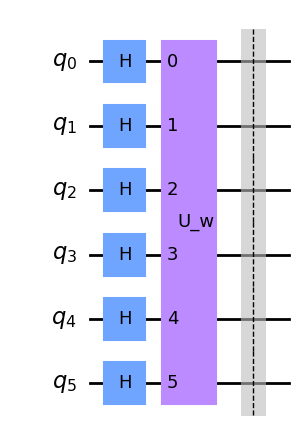

In [19]:
Nsol = 45
n = 6

grover_circuit = QuantumCircuit(n)

grover_circuit.h(range(n))

# オラクルを作成して、回路に実装
oracle = QuantumCircuit(n)

##################
### EDIT BELOW ###
##################

#oracle.?
oracle.x(1)
oracle.x(4)
oracle.h(n-1)
oracle.mcx(list(range(n-1)), n-1)
oracle.h(n-1)
oracle.x(1)
oracle.x(4)

##################
### EDIT ABOVE ###
##################

oracle_gate = oracle.to_gate()
oracle_gate.name = "U_w"
print(oracle)

grover_circuit.append(oracle_gate, list(range(n)))
grover_circuit.barrier()
grover_circuit.draw('mpl')

     ┌───┐  ┌───┐                  ┌───┐┌───┐     
q_0: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤               │  ├───┤├───┤     
q_1: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤               │  ├───┤├───┤     
q_2: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤               │  ├───┤├───┤     
q_3: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤               │  ├───┤├───┤     
q_4: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤┌─┴───┴──┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐
q_5: ┤ H ├┤ Rz(2π) ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└────────┘└───┘└───┘└───┘└───┘└───┘└───┘
     ┌───┐  ┌───┐                  ┌───┐┌───┐     
q_0: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤               │  ├───┤├───┤     
q_1: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤               │  ├───┤├───┤     
q_2: ┤ H ├──┤ X ├───────────────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤              

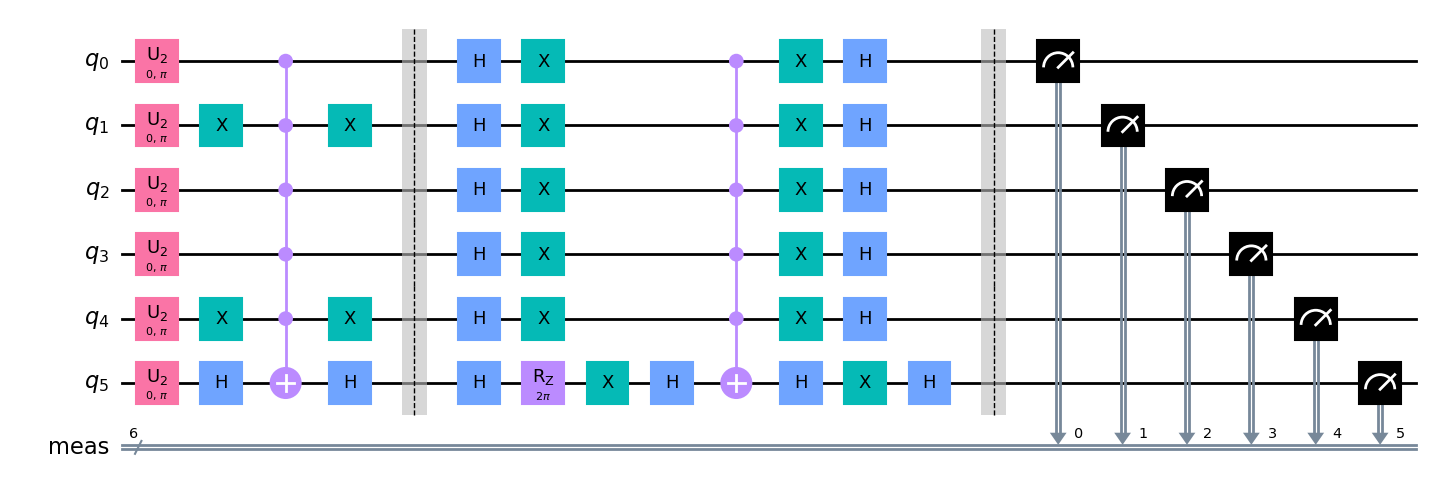

In [17]:
def diffuser(n):
    qc = QuantumCircuit(n)

    qc.h(range(n))

    ##################
    ### EDIT BELOW ###
    ##################

    #qc.?
    qc.rz(2*np.pi, n-1)
    qc.x(list(range(n)))

    # multi-controlled Zゲート
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(list(range(n)))


    ##################
    ### EDIT ABOVE ###
    ##################

    qc.h(range(n))

    #print(qc)
    U_s = qc.to_gate()
    U_s.name = "U_s"
    print(qc)
    return U_s
diffuser(6)
grover_circuit.append(diffuser(n), list(range(n)))
grover_circuit.measure_all()
grover_circuit.decompose().draw('mpl')